# **🍽️ Restaurant Tips Analysis**

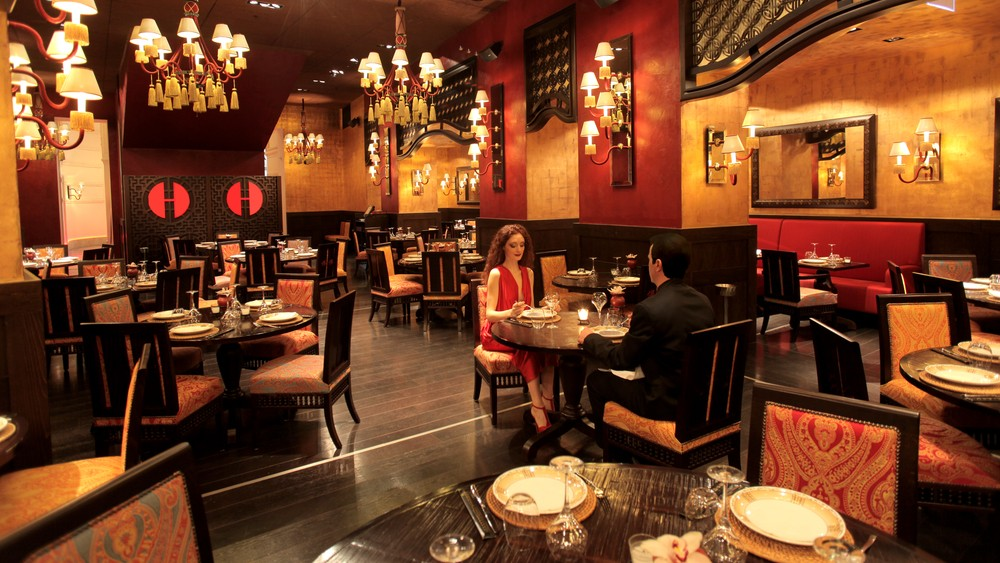

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv")

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

---



In [ ]:
print(df.head(5))


   id  total_bill   tip     sex smoker  day    time  size
0   0       16.99  1.01  Female     No  Sun  Dinner     2
1   1       10.34  1.66    Male     No  Sun  Dinner     3
2   2       21.01  3.50    Male     No  Sun  Dinner     3
3   3       23.68  3.31    Male     No  Sun  Dinner     2
4   4       24.59  3.61  Female     No  Sun  Dinner     4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

> Add blockquote



In [ ]:
print(df.dtypes)

id              int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


> **Ooops... 🤔**
>
> We have string columns considered as objects.

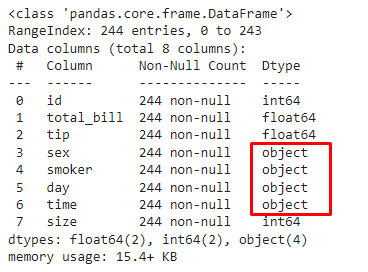

Let's fix their types and make them string:

In [ ]:
columns_to_convert = ['sex', 'smoker', 'day', 'time']
df[columns_to_convert] = df[columns_to_convert].astype(pd.StringDtype())

Check again (output columns and their types):

In [ ]:
print(df.dtypes)

id                     int64
total_bill           float64
tip                  float64
sex           string[python]
smoker        string[python]
day           string[python]
time          string[python]
size                   int64
dtype: object


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

> Add blockquote



Show a descriptive statistics of the numeric columns:

In [ ]:
df.describe()

,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

---



---



In [ ]:
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
print(smokers_df.head())

    id  total_bill   tip   sex smoker  day    time  size
56  56       38.01  3.00  Male    Yes  Sat  Dinner     4
58  58       11.24  1.76  Male    Yes  Sat  Dinner     2
60  60       20.29  3.21  Male    Yes  Sat  Dinner     2
61  61       13.81  2.00  Male    Yes  Sat  Dinner     2
62  62       11.02  1.98  Male    Yes  Sat  Dinner     2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
print(non_smokers_df.head())

   id  total_bill   tip     sex smoker  day    time  size
0   0       16.99  1.01  Female     No  Sun  Dinner     2
1   1       10.34  1.66    Male     No  Sun  Dinner     3
2   2       21.01  3.50    Male     No  Sun  Dinner     3
3   3       23.68  3.31    Male     No  Sun  Dinner     2
4   4       24.59  3.61  Female     No  Sun  Dinner     4


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()
print("Minimum tip:", common_tip_min)
print("Maximum tip:", common_tip_max)
print("Mean tip:", common_tip_mean)
print("Median tip:", common_tip_median)

Minimum tip: 1.0
Maximum tip: 10.0
Mean tip: 2.99827868852459
Median tip: 2.9


Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()
print("Minimum tip:", smokers_tip_min)
print("Maximum tip:", smokers_tip_max)
print("Mean tip:", smokers_tip_mean)
print("Median tip:", smokers_tip_median)

Minimum tip: 1.0
Maximum tip: 10.0
Mean tip: 3.008709677419355
Median tip: 3.0


Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()
print("Minimum tip:", non_smokers_tip_min)
print("Maximum tip:", non_smokers_tip_max)
print("Mean tip:", non_smokers_tip_mean)
print("Median tip:", non_smokers_tip_median)

Minimum tip: 1.0
Maximum tip: 9.0
Mean tip: 2.9918543046357615
Median tip: 2.74


Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

###1. Insight 1: Smokers Tend to Tip Slightly More Than Non-Smokers:

The mean tip value for smokers is slightly higher (3.00871) compared to non-smokers (2.991854). Similarly, the median tip value for smokers (3.00) is higher than that of non-smokers (2.74). This indicates that, on average, smokers tend to tip more than non-smokers.
###2. Insight 2:Distribution Range of Tips:

The range of tips (difference between max and min values) is the same for the common dataset and smokers (9.000), indicating that the highest tip given by smokers is the same as the highest tip in the overall dataset. However, for non-smokers, the maximum tip is slightly lower (9.000), suggesting that while non-smokers have a narrower range of tip values, smokers contribute to the higher end of the tip distribution.

####General conclusion:
Smokers, on average, tend to tip slightly more than non-smokers. This is reflected in both the mean and median tip values, which are higher for smokers compared to non-smokers. The mean tip value for smokers is approximately 3.01, while it is around 2.99 for non-smokers. Similarly, the median tip value for smokers is 3.00 compared to 2.74 for non-smokers.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

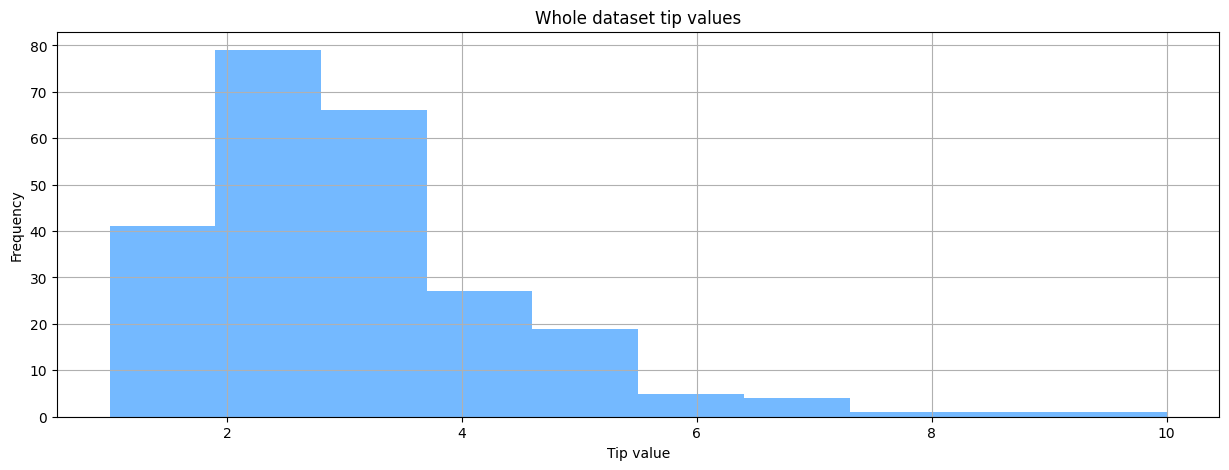

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], bins = 20, color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

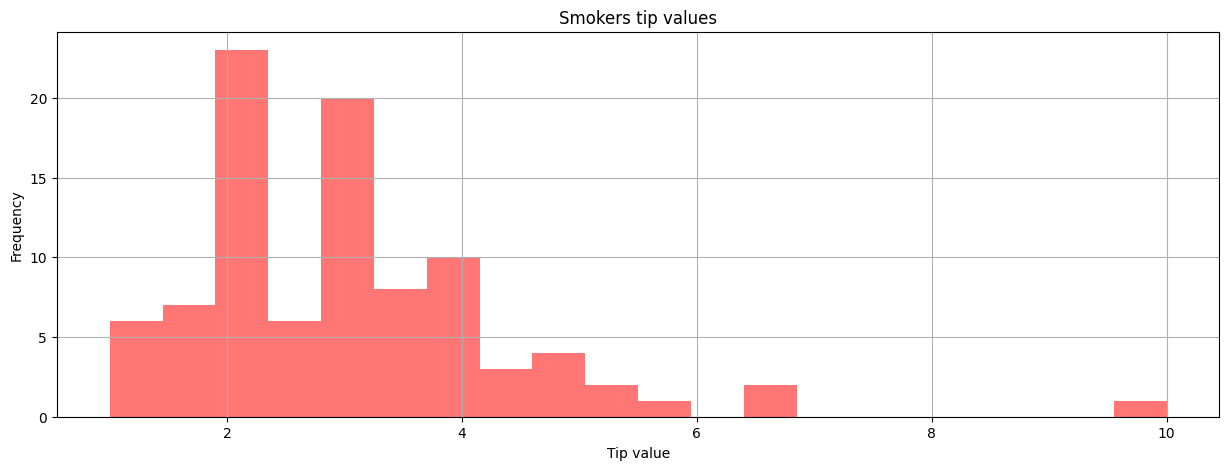

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], bins = 20, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

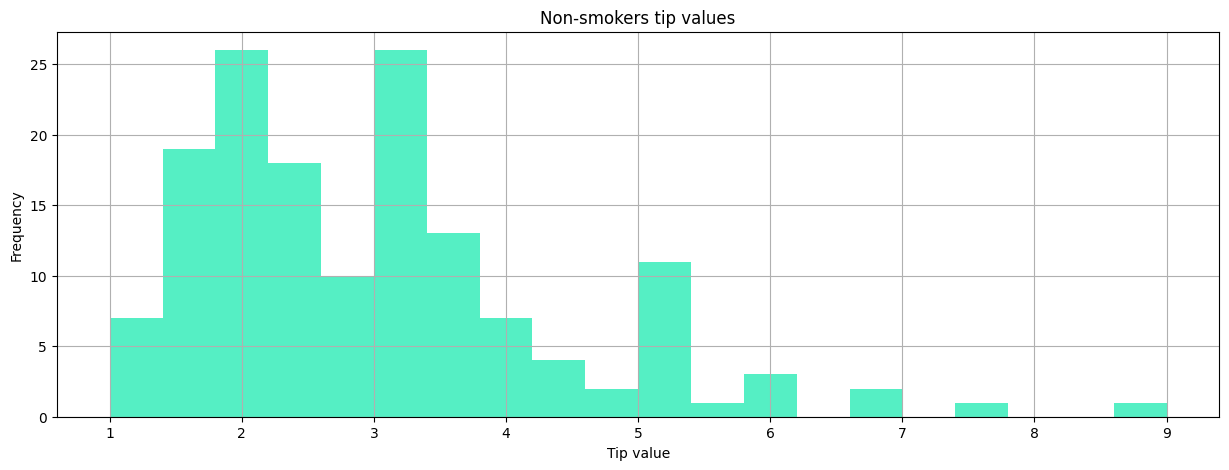

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins = 20, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

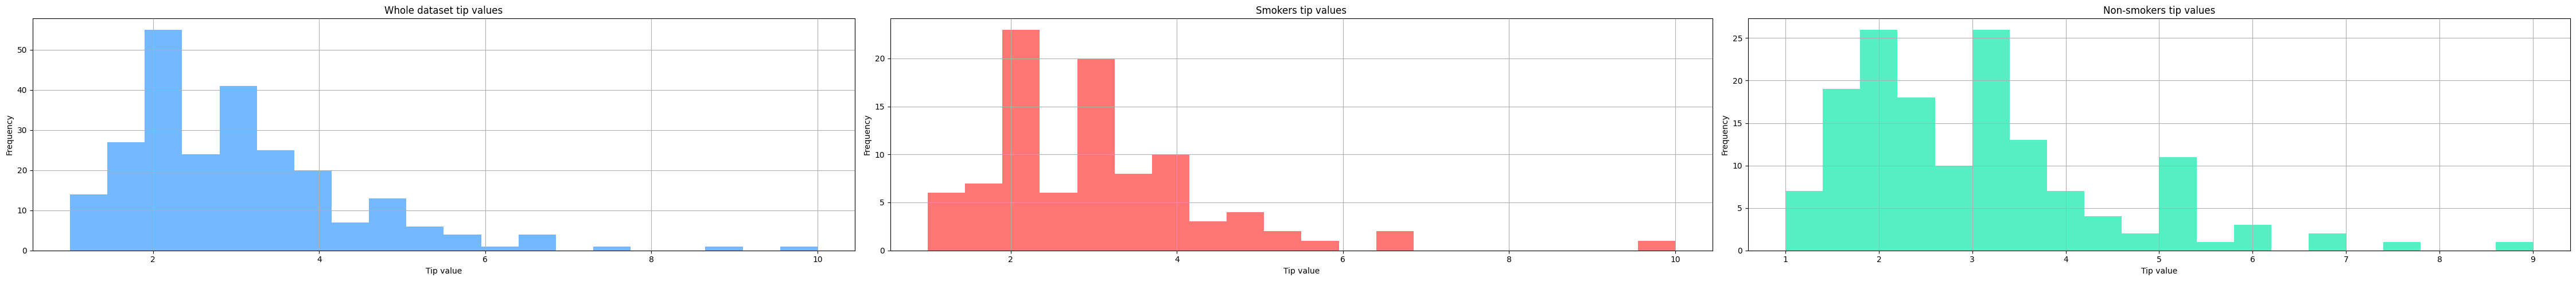

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(45, 5))
# Chart 1: Whole dataset tip values
axes[0].hist(df['tip'], bins = 20, color='#74b9ff')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)
# Chart 2: Smokers tip values
axes[1].hist(smokers_df['tip'], bins = 20, color='#ff7675')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Smokers tip values')
axes[1].grid(True)
# Chart 3: Non-smokers tip values
axes[2].hist(non_smokers_df['tip'], bins = 20, color='#55efc4')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Non-smokers tip values')
axes[2].grid(True)

plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

### Insight:
● The histogram for smokers shows a higher frequency at the upper end of the tip values compared to non-smokers. This suggests that smokers are more likely to give higher tips.

● Both histograms share a similar pattern at the lower end, indicating that the starting point for tipping is consistent across both groups.

#### General conclusion:
Based on the histogram observations, it's clear that smokers tend to tip more than non-smokers. The visual representation highlights the higher frequency of larger tips among smokers. This insight can help businesses and service providers better understand customer behavior and potentially tailor their services accordingly.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

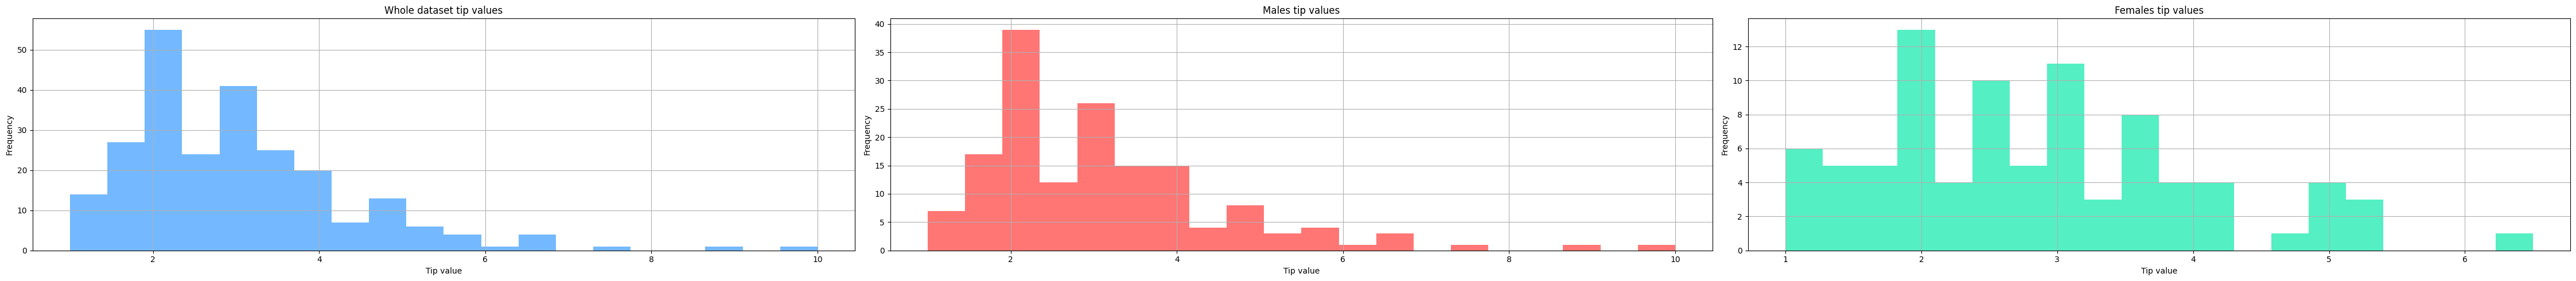

,Common,Males,Females
Min,1.000000,1.000000,1.000000
Max,10.000000,10.000000,6.500000
Mean,2.998279,3.089618,2.833448
Median,2.900000,3.000000,2.750000


In [ ]:
#Creating new df for sex:
males_df = df[df['sex'] == 'Male']
females_df = df[df['sex'] == 'Female']

#Calculate central tendency:


males_tip_min = males_df['tip'].min()
males_tip_max = males_df['tip'].max()
males_tip_mean = males_df['tip'].mean()
males_tip_median = males_df['tip'].median()

females_tip_min = females_df['tip'].min()
females_tip_max = females_df['tip'].max()
females_tip_mean = females_df['tip'].mean()
females_tip_median = females_df['tip'].median()

#Create new data frame for central tendency:
common_males_females_tip = {
    'Common': [common_tip_min, common_tip_max, common_tip_mean, common_tip_median],
    'Males': [males_tip_min, males_tip_max, males_tip_mean, males_tip_median],
    'Females': [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
}

index_labels = ["Min", "Max", "Mean", "Median"]
df_common_males_females_tip = pd.DataFrame(common_males_females_tip, index=index_labels)

#Create chart
fig, axis = plt.subplots(1, 3, figsize=(45, 5))
# Chart 1: Whole dataset tip values
axis[0].hist(df['tip'], bins = 20, color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
# Chart 2: Males tip values
axis[1].hist(males_df['tip'], bins = 20, color='#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Males tip values')
axis[1].grid(True)
# Chart 3: Females tip values
axis[2].hist(females_df['tip'],  bins = 20,color='#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Females tip values')
axis[2].grid(True)

plt.tight_layout()
plt.show()

#Print data frame
df_common_males_females_tip


### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

           Common       Sun  Mon  Tue  Wed       Thu       Fri        Sat
min      1.000000  1.010000  NaN  NaN  NaN  1.250000  1.000000   1.000000
max     10.000000  6.500000  NaN  NaN  NaN  6.700000  4.730000  10.000000
mean     2.998279  3.255132  NaN  NaN  NaN  2.771452  2.734737   2.993103
median   2.900000  3.150000  NaN  NaN  NaN  2.305000  3.000000   2.750000


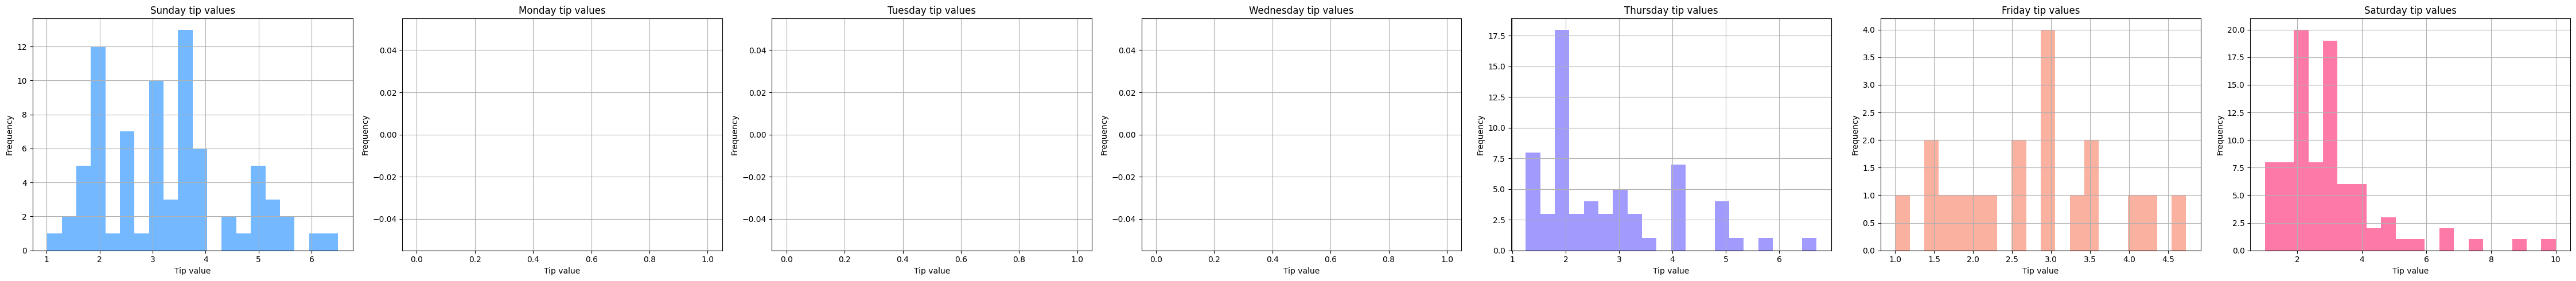

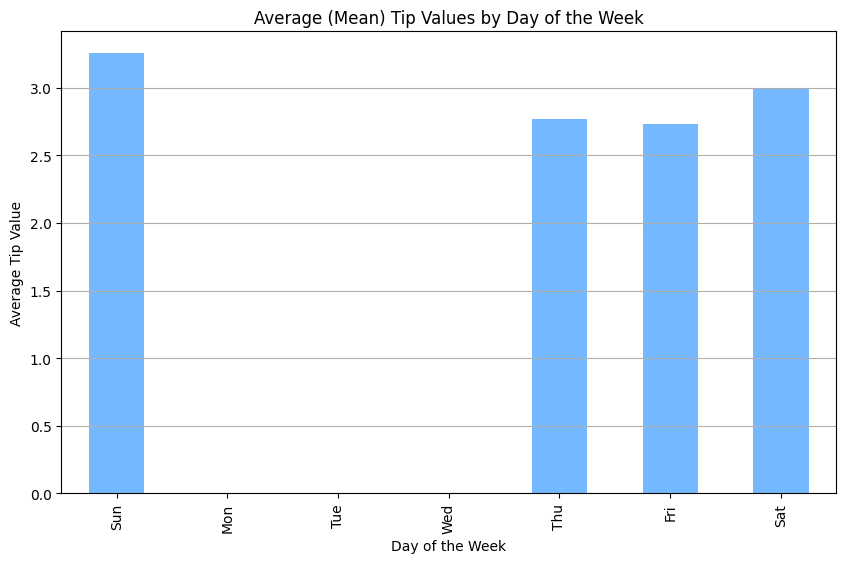

In [ ]:
#Creating new df for day:
sun_df = df[df['day'] == 'Sun']
mon_df = df[df['day'] == 'Mon']
tue_df = df[df['day'] == 'Tue']
wed_df = df[df['day'] == 'Wed']
thu_df = df[df['day'] == 'Thur']
fri_df = df[df['day'] == 'Fri']
sat_df = df[df['day'] == 'Sat']

# Calculate measures of central tendency for each day
def calculate_central_tendency(day_df):
  return { 'min': day_df['tip'].min(),
           'max': day_df['tip'].max(),
           'mean': day_df['tip'].mean(),
           'median': day_df['tip'].median()
}

sun_central_tendency = calculate_central_tendency(sun_df)
mon_central_tendency = calculate_central_tendency(mon_df)
tue_central_tendency = calculate_central_tendency(tue_df)
wed_central_tendency = calculate_central_tendency(wed_df)
thu_central_tendency = calculate_central_tendency(thu_df)
fri_central_tendency = calculate_central_tendency(fri_df)
sat_central_tendency = calculate_central_tendency(sat_df)

#Create new data frame
day_central_tendency = { 'Common': {'min': common_tip_min,
                                    'max': common_tip_max,
                                    'mean': common_tip_mean,
                                    'median': common_tip_median},
                         'Sun': sun_central_tendency,
                         'Mon': mon_central_tendency,
                         'Tue': tue_central_tendency,
                         'Wed': wed_central_tendency,
                         'Thu': thu_central_tendency,
                         'Fri': fri_central_tendency,
                         'Sat': sat_central_tendency }

df_day_central_tendency = pd.DataFrame(day_central_tendency)

#Print data frame
print(df_day_central_tendency)

# Create chart
fig, axos = plt.subplots(1, 7, figsize=(45, 5))
# Chart 1: Sunday tip values
axos[0].hist(sun_df['tip'], bins=20, color='#74b9ff')
axos[0].set_xlabel('Tip value')
axos[0].set_ylabel('Frequency')
axos[0].set_title('Sunday tip values')
axos[0].grid(True)
# Chart 2: Monday tip values
axos[1].hist(mon_df['tip'], bins=20, color='#ff7675')
axos[1].set_xlabel('Tip value')
axos[1].set_ylabel('Frequency')
axos[1].set_title('Monday tip values')
axos[1].grid(True)
# Chart 3: Tuesday tip values
axos[2].hist(tue_df['tip'], bins=20, color='#55efc4')
axos[2].set_xlabel('Tip value')
axos[2].set_ylabel('Frequency')
axos[2].set_title('Tuesday tip values')
axos[2].grid(True)
# Chart 4: Wednesday tip values
axos[3].hist(wed_df['tip'], bins=20, color='#ffeaa7')
axos[3].set_xlabel('Tip value')
axos[3].set_ylabel('Frequency')
axos[3].set_title('Wednesday tip values')
axos[3].grid(True)
# Chart 5: Thursday tip values
axos[4].hist(thu_df['tip'], bins=20, color='#a29bfe')
axos[4].set_xlabel('Tip value')
axos[4].set_ylabel('Frequency')
axos[4].set_title('Thursday tip values')
axos[4].grid(True)
# Chart 6: Friday tip values
axos[5].hist(fri_df['tip'], bins=20, color='#fab1a0')
axos[5].set_xlabel('Tip value')
axos[5].set_ylabel('Frequency')
axos[5].set_title('Friday tip values')
axos[5].grid(True)
# Chart 7: Saturday tip values
axos[6].hist(sat_df['tip'], bins=20, color='#fd79a8')
axos[6].set_xlabel('Tip value')
axos[6].set_ylabel('Frequency')
axos[6].set_title('Saturday tip values')
axos[6].grid(True)
plt.tight_layout()
plt.show()

# Extract the mean values for each day
mean_values = df_day_central_tendency.loc['mean', ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']]
# Create a column chart
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='#74b9ff')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Value')
plt.title('Average (Mean) Tip Values by Day of the Week')
plt.grid(axis='y')
plt.show()


### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

           Common     Lunch    Dinner
min      1.000000  1.250000   1.00000
max     10.000000  6.700000  10.00000
mean     2.998279  2.728088   3.10267
median   2.900000  2.250000   3.00000


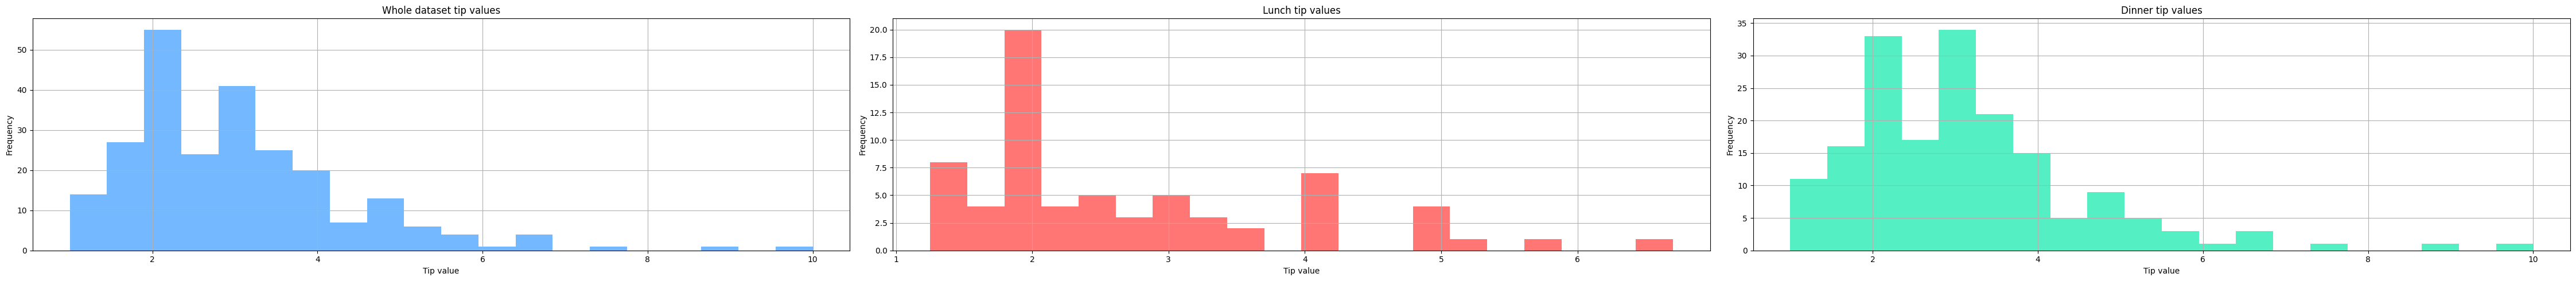

In [ ]:
# Creating new DataFrames for Lunch and Dinner
lunch_df = df[df['time'] == 'Lunch']
dinner_df = df[df['time'] == 'Dinner']

# Calculate central tendency for Lunch
lunch_tip_min = lunch_df['tip'].min()
lunch_tip_max = lunch_df['tip'].max()
lunch_tip_mean = lunch_df['tip'].mean()
lunch_tip_median = lunch_df['tip'].median()

# Calculate central tendency for Dinner
dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

# Create new data frame for central tendency
time_central_tendency = { 'Common': {'min': df['tip'].min(),
                                     'max': df['tip'].max(),
                                     'mean': df['tip'].mean(),
                                     'median': df['tip'].median()},
                          'Lunch': {'min': lunch_tip_min,
                                    'max': lunch_tip_max,
                                    'mean': lunch_tip_mean,
                                    'median': lunch_tip_median},
                          'Dinner': {'min': dinner_tip_min,
                                     'max': dinner_tip_max,
                                     'mean': dinner_tip_mean,
                                     'median': dinner_tip_median} }

df_time_central_tendency = pd.DataFrame(time_central_tendency)

# Print data frame
print(df_time_central_tendency)

# Create chart
fig, axus = plt.subplots(1, 3, figsize=(45, 5))

# Chart 1: Whole dataset tip values
axus[0].hist(df['tip'], bins=20, color='#74b9ff')
axus[0].set_xlabel('Tip value')
axus[0].set_ylabel('Frequency')
axus[0].set_title('Whole dataset tip values')
axus[0].grid(True)

# Chart 2: Lunch tip values
axus[1].hist(lunch_df['tip'], bins=20, color='#ff7675')
axus[1].set_xlabel('Tip value')
axus[1].set_ylabel('Frequency')
axus[1].set_title('Lunch tip values')
axus[1].grid(True)

# Chart 3: Dinner tip values
axus[2].hist(dinner_df['tip'], bins=20, color='#55efc4')
axus[2].set_xlabel('Tip value')
axus[2].set_ylabel('Frequency')
axus[2].set_title('Dinner tip values')
axus[2].grid(True)
plt.tight_layout()
plt.show()